In [46]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [47]:
t = 120
t1 = 40
n1 = 5
n2 = 25
n3 = 50
rf_rate=0
lowermu=.05/12
uppermu=.15/12
lowersigma = .05/sqrt(12)
uppersigma = .6/sqrt(12)
targetcorrelation = .5
targetsd=.1/sqrt(12)
sims=500

In [48]:
def generate_true_params_and_rets(N,lmu=lowermu, umu=uppermu, lsig=lowersigma, usig=uppersigma, tcor=targetcorrelation):
    mu = np.random.uniform(lmu, umu, N)
    sigma = np.random.uniform(lsig, usig, N)

    cov_matrix = np.ones((N, N)) * targetcorrelation
    np.fill_diagonal(cov_matrix, 1)
    diagsig = np.diag(sigma)
    Covariancemat = diagsig @ cov_matrix @ diagsig
    return np.random.multivariate_normal(mu,Covariancemat,t), mu, Covariancemat


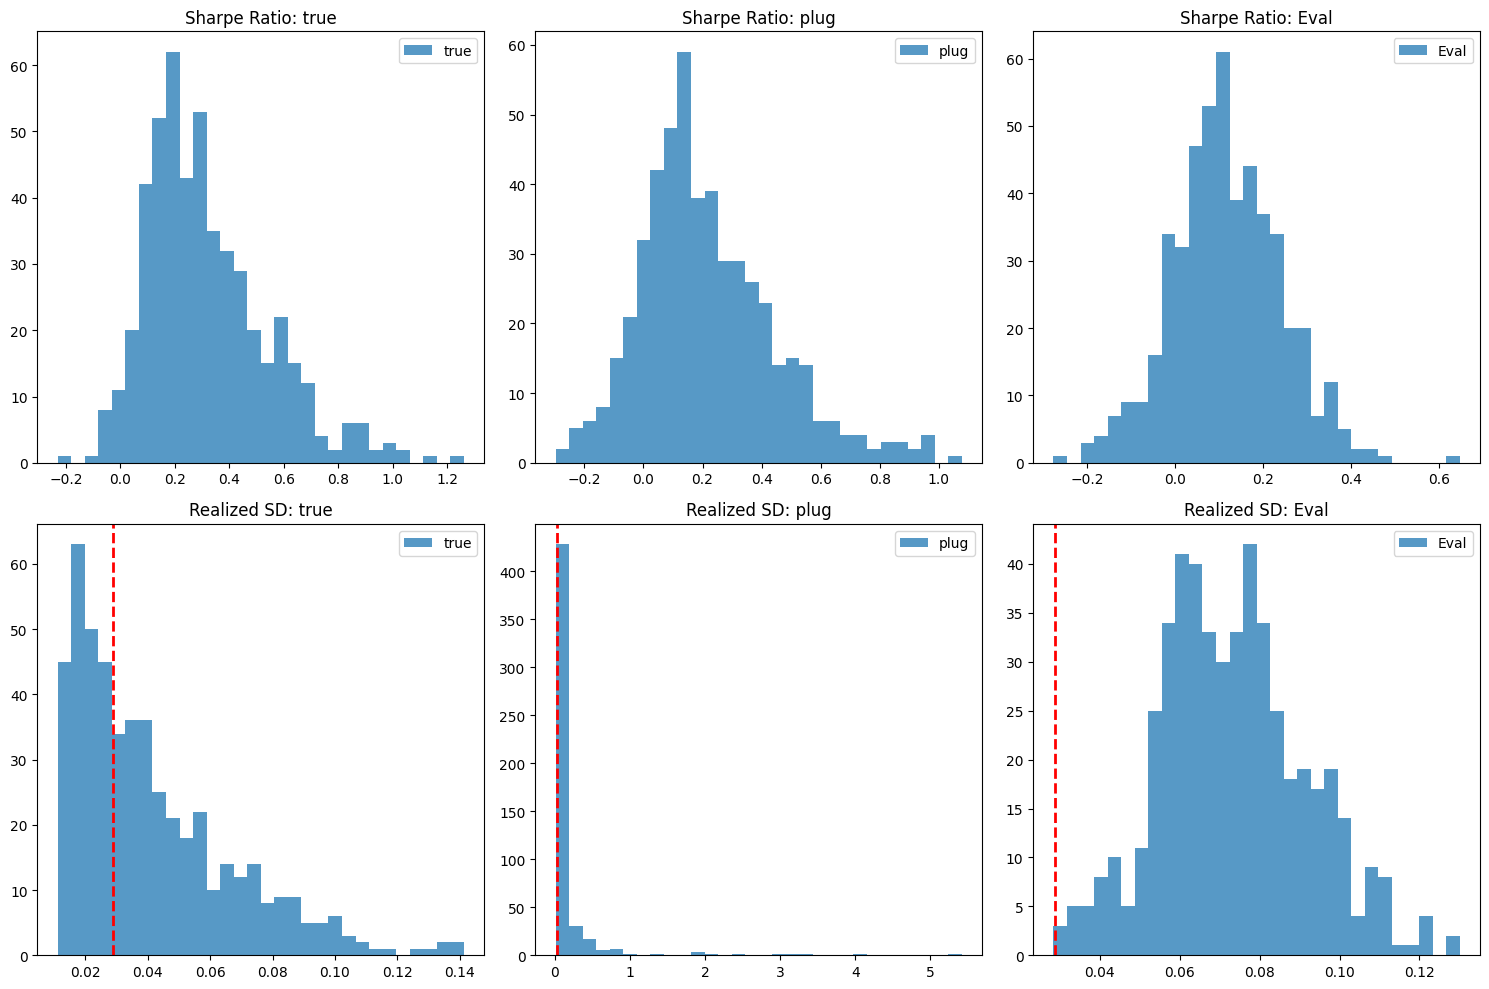

In [49]:
Sharpes = {'true':[],"plug":[],'Eval':[]}
stands = {'true':[],"plug":[],'Eval':[]}
for x in range(sims):
    returns, mu, Sigma = generate_true_params_and_rets(n1)
    returns_df = pd.DataFrame(returns)

    # True Tangency n1
    true_weights = np.linalg.inv(Sigma) @ mu / (np.ones(n1).T @ np.linalg.inv(Sigma) @ mu)
    true_returns = returns_df @ true_weights
    true_sd = np.sqrt(true_weights.T @ Sigma @ true_weights)
    true_sharpe = np.mean(true_returns[t1:]) / np.std(true_returns[t1:])
    Sharpes['true'].append(true_sharpe)
    stands['true'].append(true_sd)

    # Plugin Estimator Portfolio
    historical_returns = returns_df.iloc[:t1]
    mu_hat = historical_returns.mean()
    Sigma_hat = historical_returns.cov()
    plugin_weights = np.linalg.inv(Sigma_hat) @ mu_hat / (np.ones(n1).T @ np.linalg.inv(Sigma_hat) @ mu_hat)
    plugin_returns = returns_df.iloc[t1:] @ plugin_weights
    plugin_sd = np.sqrt(plugin_weights.T @ Sigma_hat @ plugin_weights)
    plugin_sharpe = np.mean(plugin_returns) / np.std(plugin_returns)
    Sharpes['plug'].append(plugin_sharpe)
    stands['plug'].append(plugin_sd)

    # Equally-Weighted Portfolio
    equal_weights = np.ones(n1) / n1
    equal_returns = returns_df.iloc[t1:] @ equal_weights
    equal_sd = np.sqrt(equal_weights.T @ Sigma_hat @ equal_weights)
    equal_sharpe = np.mean(equal_returns) / np.std(equal_returns)
    Sharpes['Eval'].append(equal_sharpe)
    stands['Eval'].append(equal_sd)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Sharpe 
for i, strategy in enumerate(Sharpes):
    axs[0, i].hist(Sharpes[strategy], bins=30, alpha=0.75, label=strategy)
    axs[0, i].set_title(f'Sharpe Ratio: {strategy}')
    axs[0, i].legend()

# Realized Standard Deviations
for i, strategy in enumerate(stands):
    axs[1, i].hist(stands[strategy], bins=30, alpha=0.75, label=strategy)
    axs[1, i].axvline(targetsd, color='r', linestyle='dashed', linewidth=2)
    axs[1, i].set_title(f'Realized SD: {strategy}')
    axs[1, i].legend()

plt.tight_layout()
plt.show()


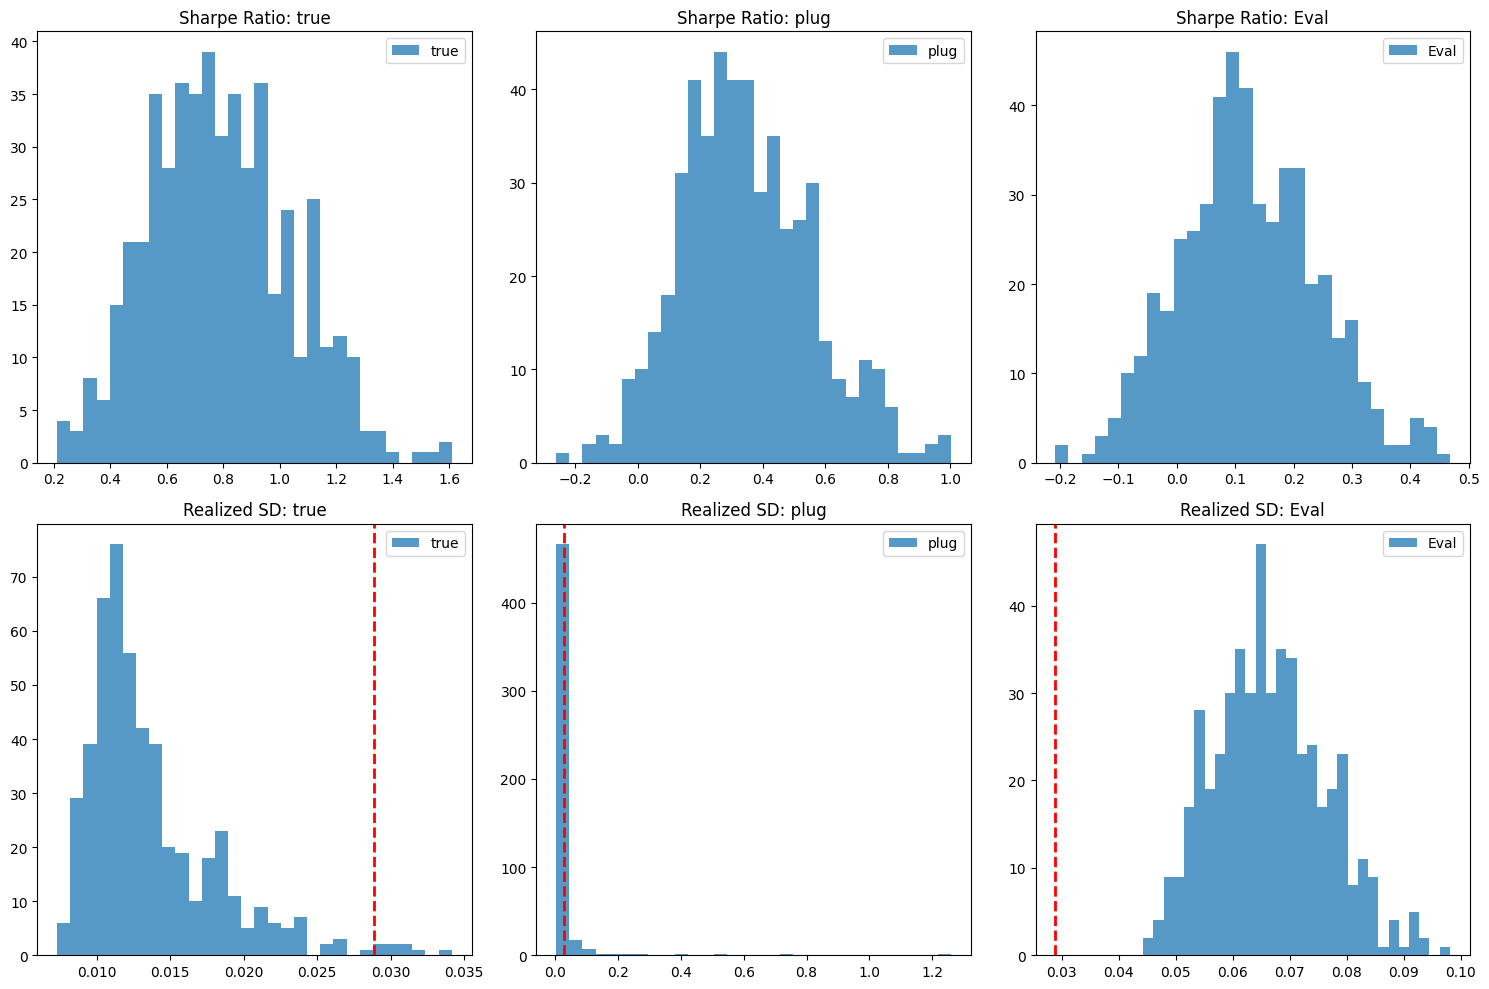

In [50]:
Sharpes = {'true':[],"plug":[],'Eval':[]}
stands = {'true':[],"plug":[],'Eval':[]}
for x in range(sims):
    returns, mu, Sigma = generate_true_params_and_rets(n2)
    returns_df = pd.DataFrame(returns)

    # True Tangency n2
    true_weights = np.linalg.inv(Sigma) @ mu / (np.ones(n2).T @ np.linalg.inv(Sigma) @ mu)
    true_returns = returns_df @ true_weights
    true_sd = np.sqrt(true_weights.T @ Sigma @ true_weights)
    true_sharpe = np.mean(true_returns[t1:]) / np.std(true_returns[t1:])
    Sharpes['true'].append(true_sharpe)
    stands['true'].append(true_sd)

    # Plugin Estimator Portfolio
    historical_returns = returns_df.iloc[:t1]
    mu_hat = historical_returns.mean()
    Sigma_hat = historical_returns.cov()
    plugin_weights = np.linalg.inv(Sigma_hat) @ mu_hat / (np.ones(n2).T @ np.linalg.inv(Sigma_hat) @ mu_hat)
    plugin_returns = returns_df.iloc[t1:] @ plugin_weights
    plugin_sd = np.sqrt(plugin_weights.T @ Sigma_hat @ plugin_weights)
    plugin_sharpe = np.mean(plugin_returns) / np.std(plugin_returns)
    Sharpes['plug'].append(plugin_sharpe)
    stands['plug'].append(plugin_sd)

    # Equally-Weighted Portfolio
    equal_weights = np.ones(n2) / n2
    equal_returns = returns_df.iloc[t1:] @ equal_weights
    equal_sd = np.sqrt(equal_weights.T @ Sigma_hat @ equal_weights)
    equal_sharpe = np.mean(equal_returns) / np.std(equal_returns)
    Sharpes['Eval'].append(equal_sharpe)
    stands['Eval'].append(equal_sd)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Sharpe 
for i, strategy in enumerate(Sharpes):
    axs[0, i].hist(Sharpes[strategy], bins=30, alpha=0.75, label=strategy)
    axs[0, i].set_title(f'Sharpe Ratio: {strategy}')
    axs[0, i].legend()

# Realized Standard Deviations
for i, strategy in enumerate(stands):
    axs[1, i].hist(stands[strategy], bins=30, alpha=0.75, label=strategy)
    axs[1, i].axvline(targetsd, color='r', linestyle='dashed', linewidth=2)
    axs[1, i].set_title(f'Realized SD: {strategy}')
    axs[1, i].legend()

plt.tight_layout()
plt.show()


C:\Users\rra3\AppData\Local\Temp\ipykernel_20456\4026465034.py:21: RuntimeWarning: invalid value encountered in sqrt
  plugin_sd = np.sqrt(plugin_weights.T @ Sigma_hat @ plugin_weights)
C:\Users\rra3\AppData\Local\Temp\ipykernel_20456\4026465034.py:21: RuntimeWarning: invalid value encountered in sqrt
  plugin_sd = np.sqrt(plugin_weights.T @ Sigma_hat @ plugin_weights)
C:\Users\rra3\AppData\Local\Temp\ipykernel_20456\4026465034.py:21: RuntimeWarning: invalid value encountered in sqrt
  plugin_sd = np.sqrt(plugin_weights.T @ Sigma_hat @ plugin_weights)
C:\Users\rra3\AppData\Local\Temp\ipykernel_20456\4026465034.py:21: RuntimeWarning: invalid value encountered in sqrt
  plugin_sd = np.sqrt(plugin_weights.T @ Sigma_hat @ plugin_weights)
C:\Users\rra3\AppData\Local\Temp\ipykernel_20456\4026465034.py:21: RuntimeWarning: invalid value encountered in sqrt
  plugin_sd = np.sqrt(plugin_weights.T @ Sigma_hat @ plugin_weights)
C:\Users\rra3\AppData\Local\Temp\ipykernel_20456\4026465034.py:21: Run

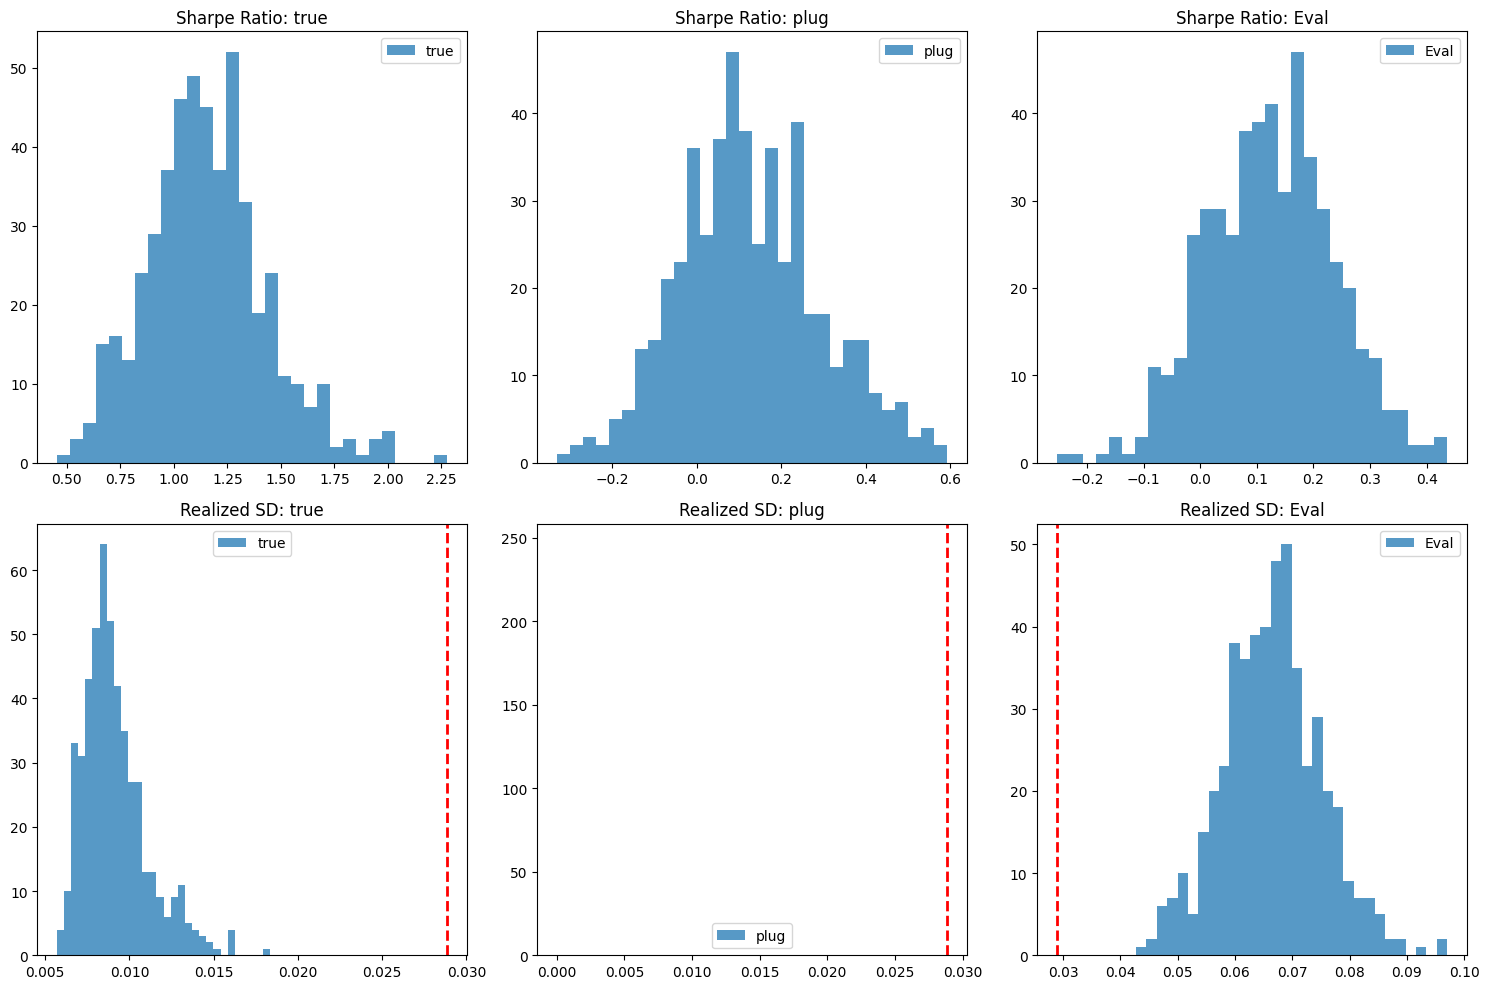

In [51]:
Sharpes = {'true':[],"plug":[],'Eval':[]}
stands = {'true':[],"plug":[],'Eval':[]}
for x in range(sims):
    returns, mu, Sigma = generate_true_params_and_rets(n3)
    returns_df = pd.DataFrame(returns)

    # True Tangency n3
    true_weights = np.linalg.inv(Sigma) @ mu / (np.ones(n3).T @ np.linalg.inv(Sigma) @ mu)
    true_returns = returns_df @ true_weights
    true_sd = np.sqrt(true_weights.T @ Sigma @ true_weights)
    true_sharpe = np.mean(true_returns[t1:]) / np.std(true_returns[t1:])
    Sharpes['true'].append(true_sharpe)
    stands['true'].append(true_sd)

    # Plugin Estimator Portfolio
    historical_returns = returns_df.iloc[:t1]
    mu_hat = historical_returns.mean()
    Sigma_hat = historical_returns.cov()
    plugin_weights = np.linalg.inv(Sigma_hat) @ mu_hat / (np.ones(n3).T @ np.linalg.inv(Sigma_hat) @ mu_hat)
    plugin_returns = returns_df.iloc[t1:] @ plugin_weights
    plugin_sd = np.sqrt(plugin_weights.T @ Sigma_hat @ plugin_weights)
    plugin_sharpe = np.mean(plugin_returns) / np.std(plugin_returns)
    Sharpes['plug'].append(plugin_sharpe)
    stands['plug'].append(plugin_sd)

    # Equally-Weighted Portfolio
    equal_weights = np.ones(n3) / n3
    equal_returns = returns_df.iloc[t1:] @ equal_weights
    equal_sd = np.sqrt(equal_weights.T @ Sigma_hat @ equal_weights)
    equal_sharpe = np.mean(equal_returns) / np.std(equal_returns)
    Sharpes['Eval'].append(equal_sharpe)
    stands['Eval'].append(equal_sd)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Sharpe 
for i, strategy in enumerate(Sharpes):
    axs[0, i].hist(Sharpes[strategy], bins=30, alpha=0.75, label=strategy)
    axs[0, i].set_title(f'Sharpe Ratio: {strategy}')
    axs[0, i].legend()

# Realized Standard Deviations
for i, strategy in enumerate(stands):
    axs[1, i].hist(stands[strategy], bins=30, alpha=0.75, label=strategy)
    axs[1, i].axvline(targetsd, color='r', linestyle='dashed', linewidth=2)
    axs[1, i].set_title(f'Realized SD: {strategy}')
    axs[1, i].legend()

plt.tight_layout()
plt.show()